In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features

In [3]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_03")
plot_path.mkdir(parents=True, exist_ok=True)

## Exercise 3.3: Feature Exploration with Pairplots

In this exercise, you will create a seaborn pairplot to visualize relationships between the features extracted from the welding data. 

In [4]:
n_samples = 1_000
data, labels, _ = get_welding_data(data_path, n_samples=n_samples)
features = extract_features(data, labels)
features.head()

,label,current_mean,current_std,current_median,current_min,current_max,current_range,current_rms,voltage_mean,voltage_std,...,voltage_min,voltage_max,voltage_range,voltage_rms,current_dom_freq,voltage_dom_freq,power_mean,power_std,power_max,power_median
0,1,145.726476,165.291809,42.877889,28.791289,506.234640,477.443351,220.047679,17.570094,5.784209,...,0.304744,28.132720,27.827976,18.493187,0.005,0.010,3331.236068,4536.220055,14073.317330,695.324588
1,1,174.852808,181.678933,77.434020,36.854889,539.440668,502.585779,251.824746,19.434779,8.895065,...,1.748986,31.707070,29.958085,21.364391,0.005,0.010,4441.754910,5851.292876,17073.089705,945.239828
2,0,160.301534,174.651311,59.876377,28.779933,525.716875,496.936942,236.742786,24.993020,3.779350,...,21.084299,33.141801,12.057502,25.275742,0.005,0.005,4656.297136,5703.079843,17419.329369,1372.529980
3,0,215.443723,192.183337,89.361030,61.584943,550.320614,488.735671,288.384744,23.810315,4.380251,...,19.429167,31.510545,12.081378,24.207886,0.005,0.005,5953.559274,6155.998512,17308.697455,2049.402983
4,1,177.184983,186.797122,55.930695,47.353630,544.334302,496.980672,257.124906,23.065599,5.452087,...,5.023940,34.541182,29.517242,23.698069,0.005,0.025,4782.559606,5819.392798,16884.479433,1125.083449


Pairplot aller Features gespeichert unter: plots/ex_03/feature_pairplot_allvars.png


<Figure size 1200x1200 with 0 Axes>

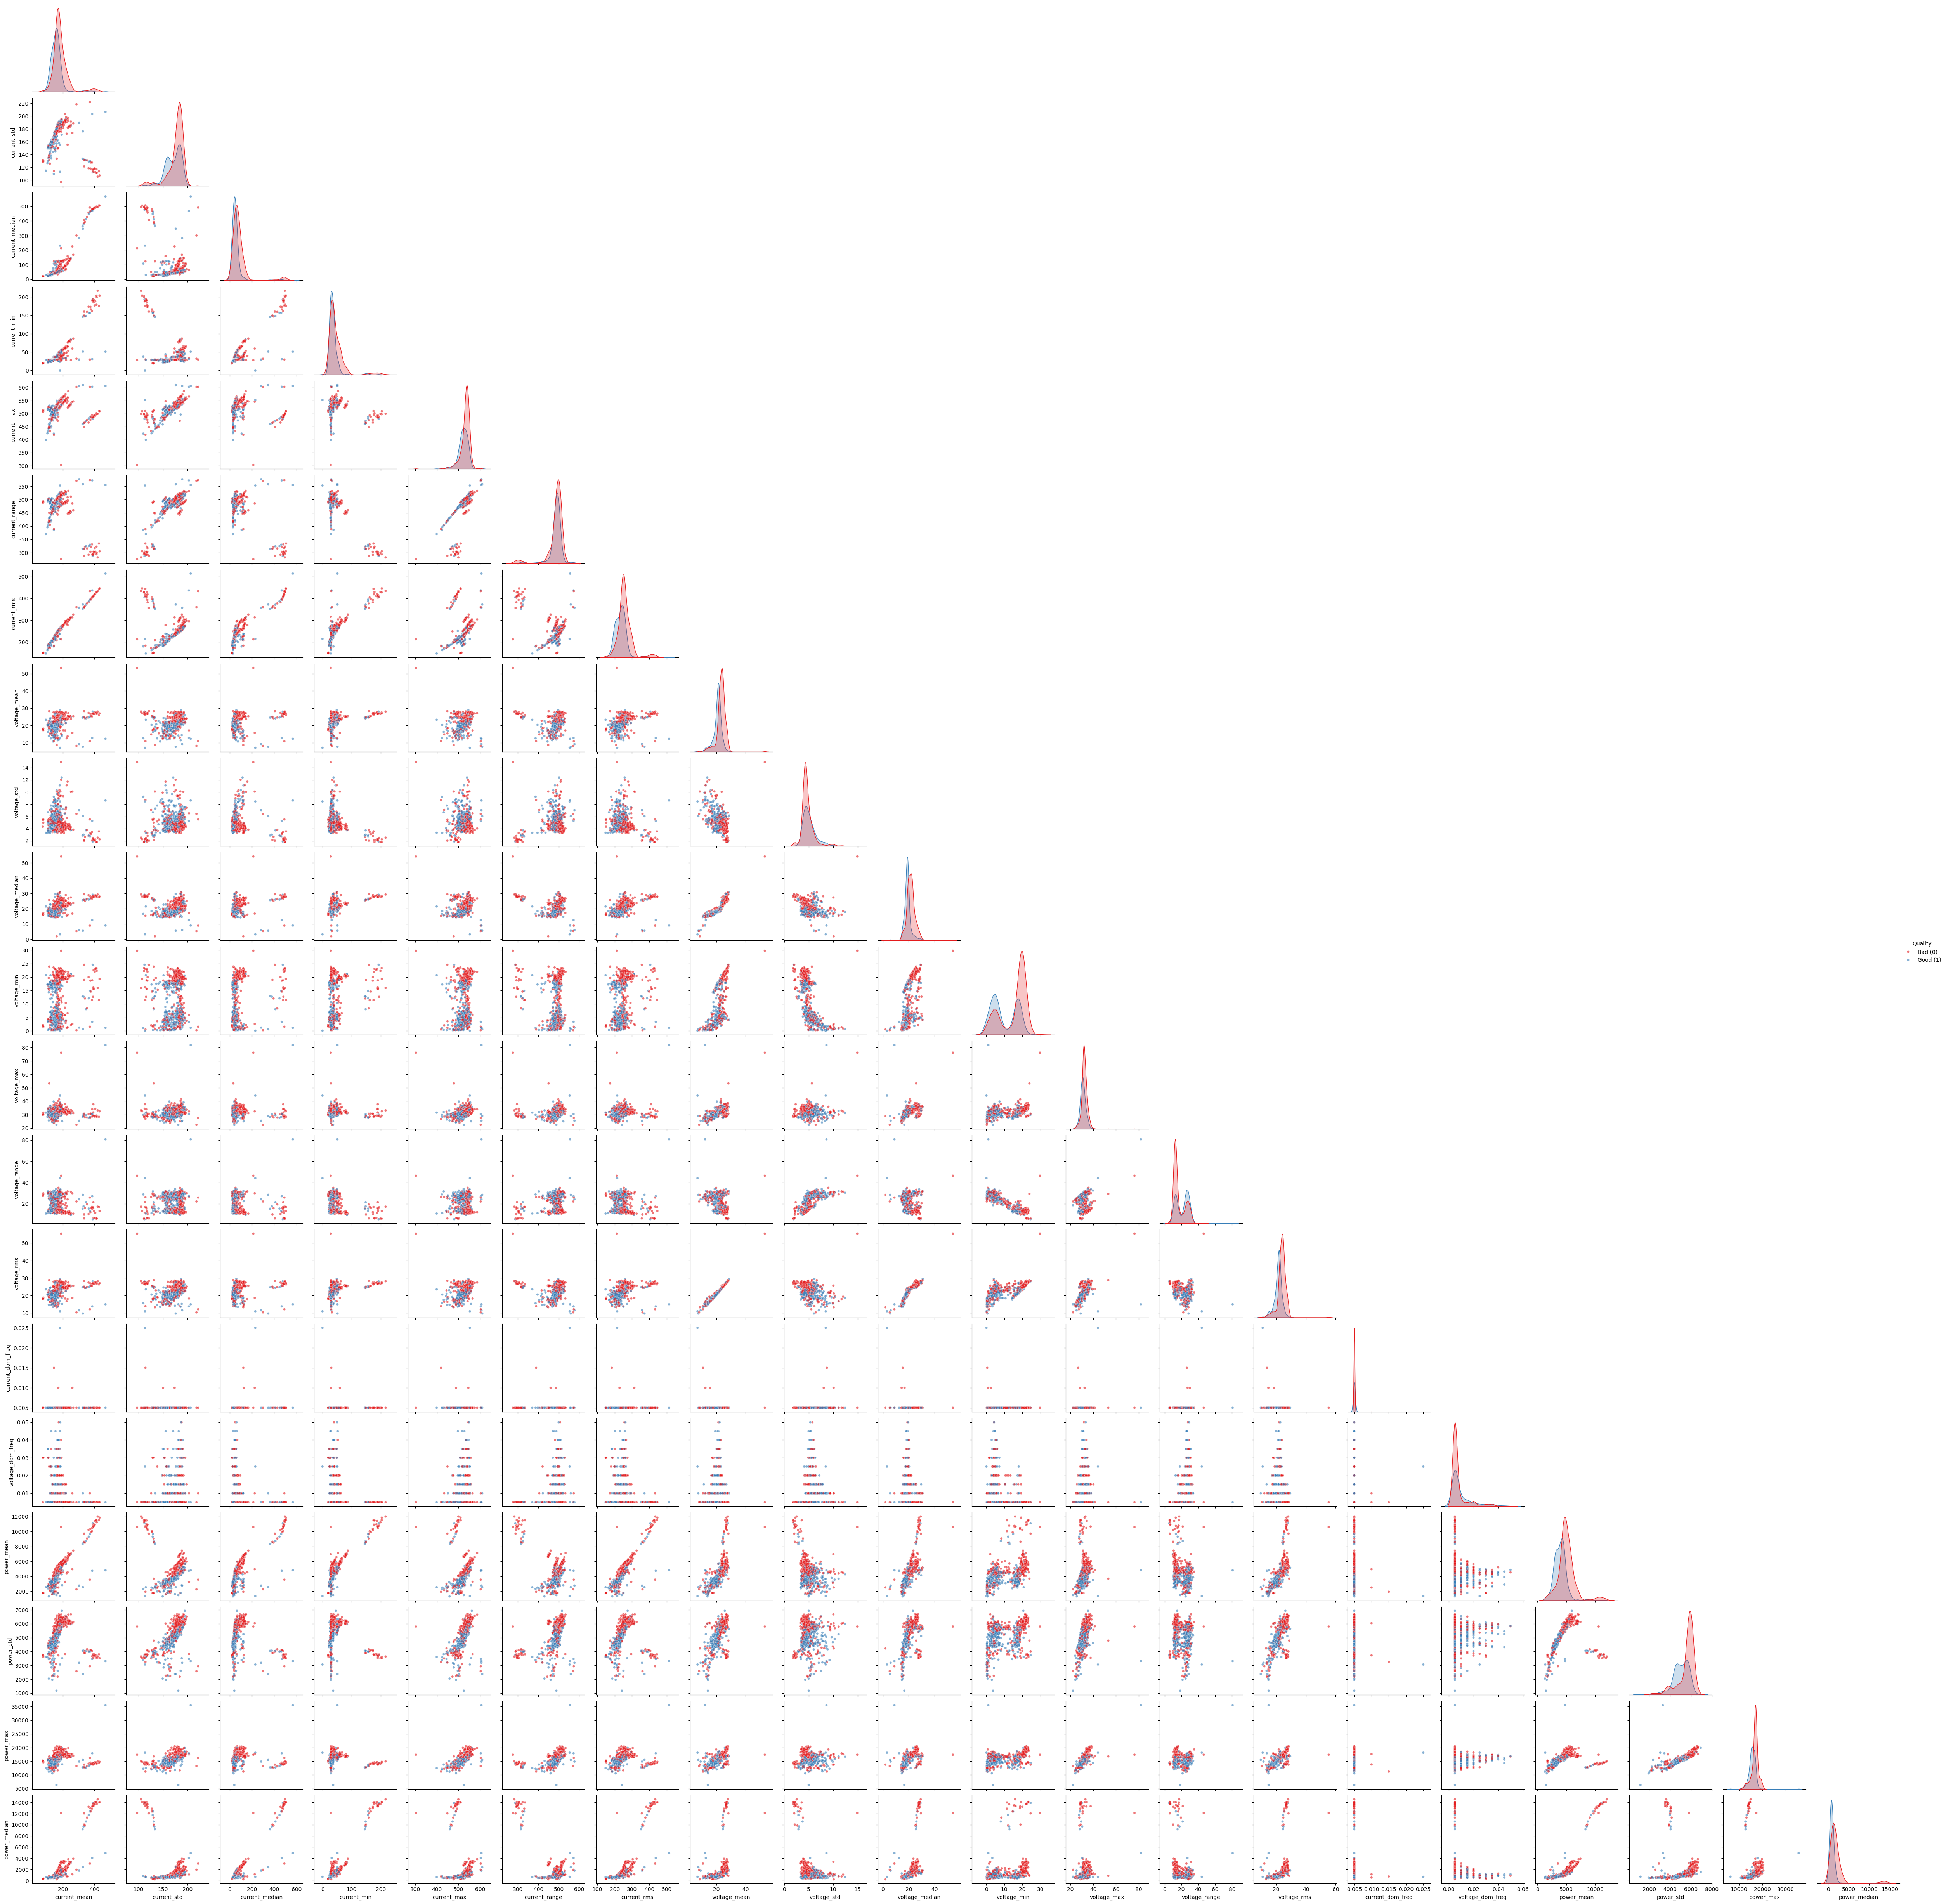

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatisch alle Features außer 'label'
cols = [c for c in features.columns if c != 'label']

# DataFrame für Plot vorbereiten
df_plot = features[cols + ['label']].copy()
df_plot['label'] = df_plot['label'].astype('category')

# Pairplot erstellen
plt.figure(figsize=(12, 12))  # ggf. anpassen bei vielen Features
pairgrid = sns.pairplot(
    df_plot,
    hue='label',
    vars=cols,
    palette='Set1',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.6, 's': 20},
    diag_kws={'fill': True}
)

# Legende anpassen
pairgrid._legend.set_title('Quality')
for t, l in zip(pairgrid._legend.texts, ['Bad (0)', 'Good (1)']):
    t.set_text(l)

# Speichern
output_file = plot_path / "feature_pairplot_allvars.png"
pairgrid.savefig(output_file, dpi=300)

print(f"Pairplot aller Features gespeichert unter: {output_file}")

Beschränkter Pairplot gespeichert unter: plots/ex_03/feature_pairplot_6vars.png


<Figure size 1000x1000 with 0 Axes>

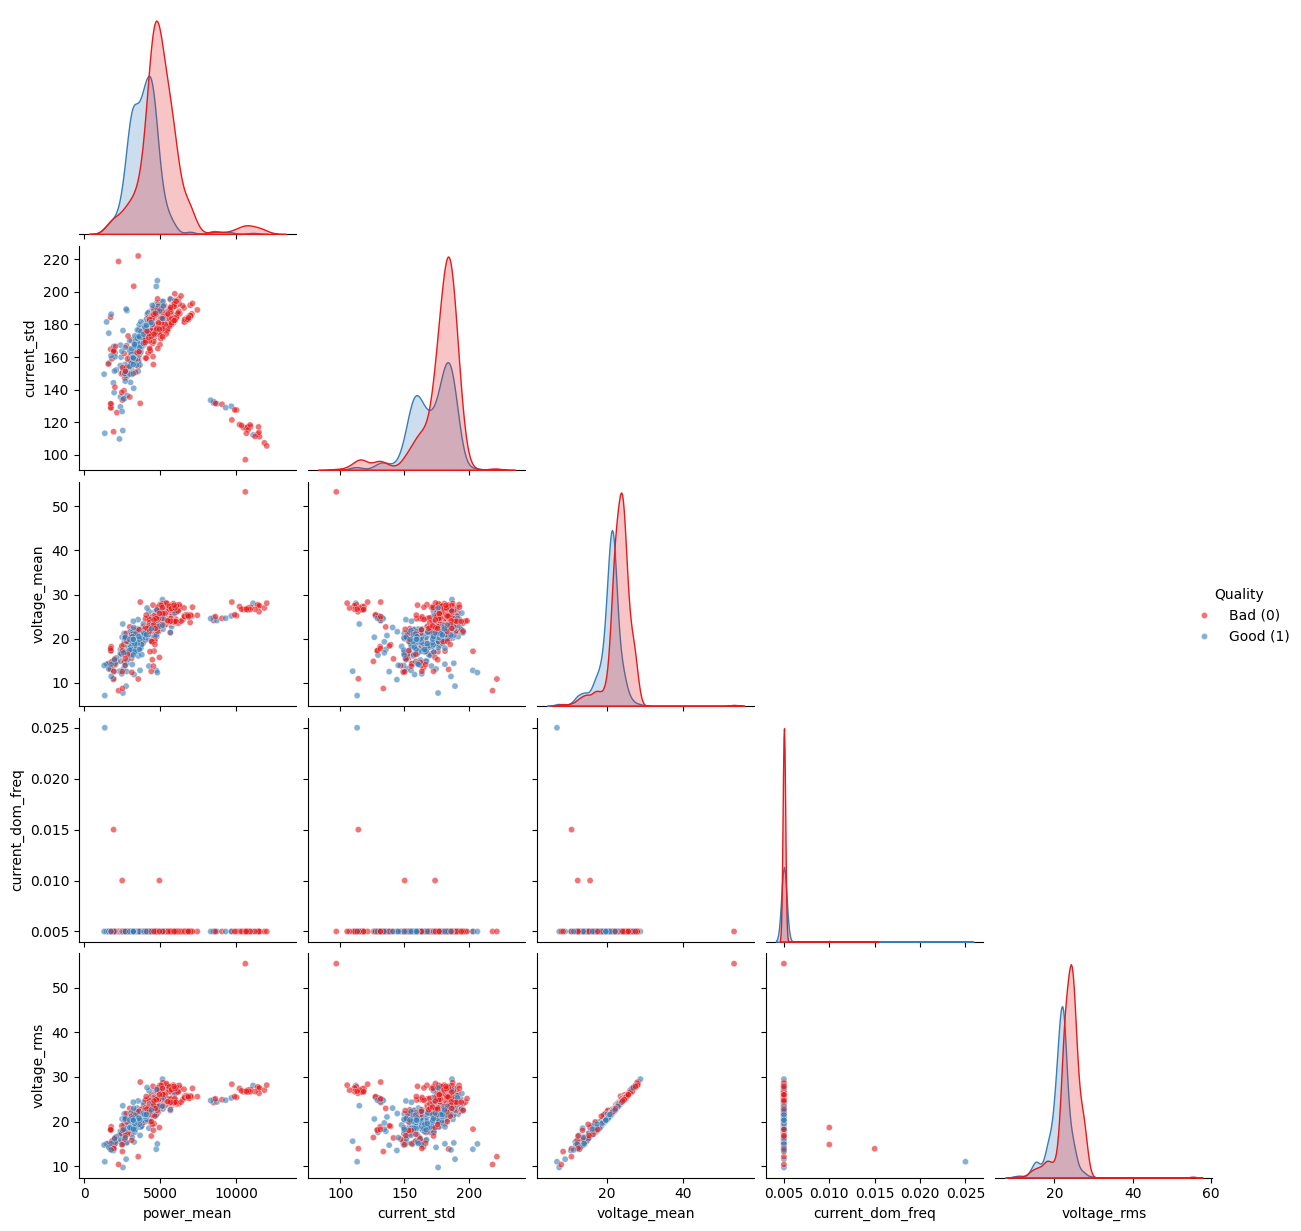

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset von 6 Features + Label
cols = [
    'power_mean', 'label', 'current_std', 'voltage_mean', 'current_dom_freq', 'voltage_rms'
]
df_plot = features[cols].copy()
df_plot['label'] = df_plot['label'].astype('category')

# Pairplot mit fill statt shade im diagonal plot
plt.figure(figsize=(10, 10))
pairgrid = sns.pairplot(
    df_plot,
    hue='label',
    vars=[c for c in cols if c != 'label'],
    palette='Set1',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.6, 's': 20},
    diag_kws={'fill': True}      # <-- hier angepasst
)

# Legende anpassen
pairgrid._legend.set_title('Quality')
for t, l in zip(pairgrid._legend.texts, ['Bad (0)', 'Good (1)']):
    t.set_text(l)

# Speichern als PNG
output_file = plot_path / "feature_pairplot_6vars.png"
pairgrid.savefig(output_file, dpi=300)

print(f"Beschränkter Pairplot gespeichert unter: {output_file}")


## Exercise 3.4: Describe Your Feature Selection

Based on the pairplot visualization from Exercise 3.1, provide a detailed analysis of your feature selection:

1. Which features appear most effective at separating the quality classes?
2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
3. Explain the physical significance of your selected features in the context of welding quality.
4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.


### 1. Which features appear most effective at separating the quality classes?
- **Power Mean (`power_mean`)**: Gute Zyklen ("Good") tendieren zu einem niedrigeren bis moderaten mittleren Leistungswert, während fehlerhafte ("Bad") Zyklen auffallend hohe oder sehr niedrige Leistungswerte zeigen.  
- **Current Standard Deviation (`current_std`)**: Die Streuung im Stromsignal trennt Klassen, da instabile Schweißzyklen (häufig Fehler) stärkere Fluktuationen im Strom aufweisen.  
- **Voltage Mean (`voltage_mean`)**: Zwar etwas weniger ausgeprägt, aber fehlerfreie Zyklen weisen tendenziell einen engeren Spannungsbereich um den Mittelwert auf.

---

### 2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
- **Correlation Observed**  
  - `current_mean` und `power_mean` sind eng korreliert (höherer mittlerer Strom = höhere mittlere Leistung).  
  - `voltage_mean` und `power_mean` ebenfalls teils korreliert, aber schwächer.  
- **Redundanz-Entfernung**  
  - Um Redundanz zu vermeiden, wäre es sinnvoll, aus stark korrelierten Paaren nur ein Feature beizubehalten – z. B. entweder `power_mean` **oder** `current_mean`, nicht beide.  
  - Dasselbe gilt für `current_std` und `power_std`.

---

### 3. Explain the physical significance of your selected features
- **Current Standard Deviation (`current_std`)**  
  - Zeigt Fluktuationen im Stromverlauf – starke Schwankungen können auf einen instabilen Lichtbogen oder ungleichmäßiges Schmelzen hindeuten.  
- **Voltage Mean (`voltage_mean`)**  
  - Der Spannungs-Mittelwert gibt Hinweise auf die Lichtbogenlänge. Konstante Werte sprechen für stabile Bedingungen.  
- **Power Mean (`power_mean`)**  
  - Kombination aus Spannung × Strom – beschreibt die tatsächlich zugeführte Energie.  
- **Dominant Frequencies**  
  - Wiederkehrende Frequenzmuster im Signal können Rückschlüsse auf periodische Instabilitäten oder das Abschmelzverhalten geben.  
- **RMS (Root Mean Square)**  
  - RMS-Werte vereinen mittlere Leistung und Schwankungen in einem Maß und sind daher besonders aussagekräftig.

---

### 4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
1. **Power Mean (`power_mean`)** – misst die mittlere eingebrachte Energie und zeigt klare Unterschiede zwischen guten und fehlerhaften Zyklen.  
2. **Current Standard Deviation (`current_std`)** – gibt Aufschluss über Instabilitäten im Prozess, wie Flackern oder Stromschwankungen.  
3. **Voltage Mean (`voltage_mean`)** – reflektiert die Stabilität der Lichtbogenlänge.  
4. **Current Dominant Frequency (`current_dom_freq`)** – erfasst periodische Muster im Stromsignal, die auf systematische Fehler hindeuten können.  
5. **Voltage RMS (`voltage_rms`)** – kombiniert Spannungsniveau und Schwankungen, nützlich zur Einschätzung der Gesamtenergie.

*Begründung:* Diese Auswahl berücksichtigt sowohl statistische als auch frequenzbasierte Eigenschaften und vermeidet redundante Informationen.

---

### 5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.
- **Nicht-lineare Trennung:** Modelle mit nicht-linearen Entscheidungsgrenzen kommen mit den Verteilungen besser klar.  
- **Kombinationen von Features erkennen Gruppen:** Manche Kombinationen (z. B. hohe current_std und niedrige voltage_mean) gruppieren ähnliche Beispiele. Solche Muster sind für Clustering-Verfahren wie K-Means oder dichtebasiertes Clustering interessant, da sie Clusterstrukturen aufdecken können – etwa Gruppen von fehlerhaften Schweißnähten.

- **Merkmals-Skalierung kann notwendig sein:** Da einige Features (z. B. power_max) deutlich größere Wertebereiche haben als andere, kann eine Standardisierung helfen – besonders bei logistischer Regression und Clustering-Verfahren wie K-Means, die empfindlich auf unterschiedliche Skalen reagieren.

- **Ausreißer stören einfache Modelle:** Extremwerte in Strom oder Spannung können die Entscheidungsgrenzen verschieben, insbesondere bei der logistischen Regression. Eine vorherige Filterung oder robuste Transformation (z. B. per Quantil-Clippen) kann die Modellgüte verbessern.